In [1]:
# load from news.2013.en.trainlen.200.evaluation.100000.merged.csv
import pandas as pd
import numpy as np

# load data
data = pd.read_csv('news.2013.en.trainlen.200.evaluation.100000.merged.csv')
# print columns
print(data.columns)

Index(['original_text', 'text', 'bigram_js_divergence', 'depth_of_parse_tree',
       'gpt2_perplexity', 'gpt2_tokens_per_char', 'named_entities',
       'pos_bigram_js_divergence', 'pos_js_divergence',
       'unigram_js_divergence', 'lang', 'weird', 'enigma_generated_text_17510',
       'enigma_error_count_17510',
       'en_noisevignere_checkpoint-10000_error_count',
       'en_noisevignere_checkpoint-10000_generated_text',
       'en_noisevignere_checkpoint-15000_error_count',
       'en_noisevignere_checkpoint-15000_generated_text',
       'en_noisevignere_checkpoint-20000_error_count',
       'en_noisevignere_checkpoint-20000_generated_text',
       'en_noisevignere_checkpoint-5000_error_count',
       'en_noisevignere_checkpoint-5000_generated_text',
       'en_noisyconsteenigma_checkpoint-10000_error_count',
       'en_noisyconsteenigma_checkpoint-10000_generated_text',
       'en_noisyconsteenigma_checkpoint-15000_error_count',
       'en_noisyconsteenigma_checkpoint-15000_gen

In [2]:
enigmaevolution_columns = [
       'en_noisyconsteenigma_checkpoint-5000_error_rate',
       'en_noisyconsteenigma_checkpoint-10000_error_rate',
       'en_noisyconsteenigma_checkpoint-15000_error_rate',
       'en_noisyconsteenigma_checkpoint-20000_error_rate',
]

In [3]:
vignereevolution_columns = [
       'en_noisevignere_checkpoint-5000_error_rate',
       'en_noisevignere_checkpoint-10000_error_rate',
       'en_noisevignere_checkpoint-15000_error_rate',
       'en_noisevignere_checkpoint-20000_error_rate',
]

In [ ]:
# add a column for length of 'text'
data['text_length'] = data['text'].apply(len)


In [10]:
# for each evoltuion column replace it with the error rate
for column in enigmaevolution_columns:
    data[column] = data[column] / data['text_length']
# remove rows which have error rate > 1
data = data[data[enigmaevolution_columns].apply(lambda x: x < 1).all(axis=1)]

for column in vignereevolution_columns:
    data[column] = data[column] / data['text_length']
    


In [11]:
# remove rows which have error rate > 1, that's clearly a bug
data = data[data[vignereevolution_columns].apply(lambda x: x < 1).all(axis=1)]
# print number of rows
print(len(data))
# rename all columns containing *count to *rate
data.rename(columns=lambda x: x.replace('_count', '_rate'), inplace=True)

99889


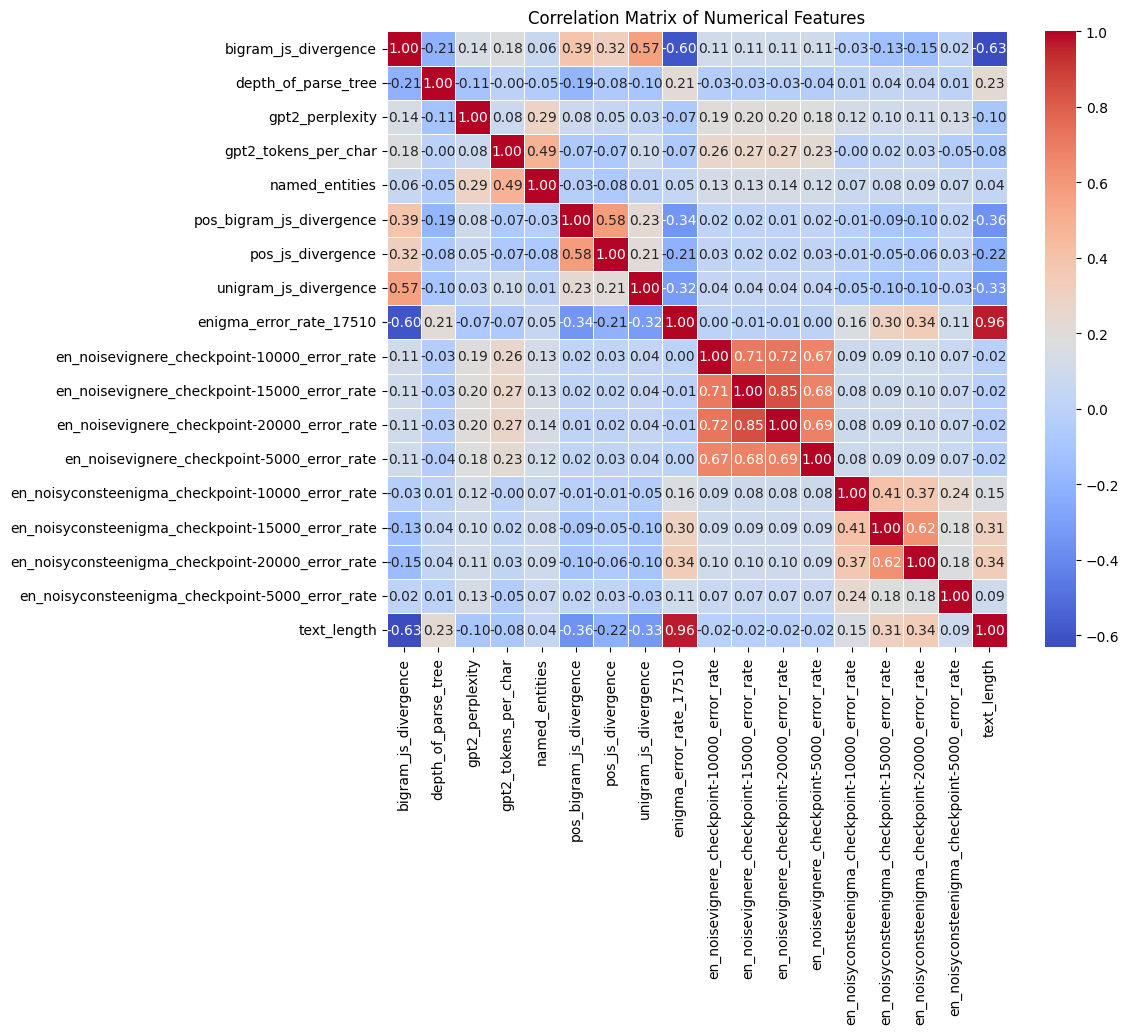

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# print correlation matrix between all the nontext columns

numerical_df = data.select_dtypes(include=[np.number])

# Calculating the correlation matrix
correlation_matrix = numerical_df.corr()

# Printing the correlation matrix
plt.figure(figsize=(10, 8)) # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
# print(correlation_matrix)



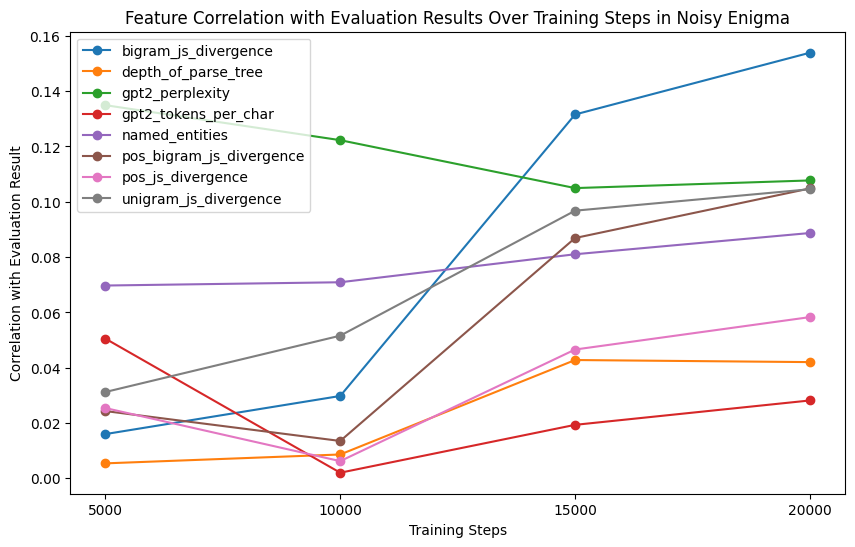

In [16]:
# plot evolution of correlations for each feature over the 4 checkpoints corr
features = ['bigram_js_divergence', 'depth_of_parse_tree',
       'gpt2_perplexity', 'gpt2_tokens_per_char', 'named_entities',
       'pos_bigram_js_divergence', 'pos_js_divergence',
       'unigram_js_divergence']

steps = [5000, 10000, 15000, 20000]

correlation_data = []
# Calculate correlation for each feature across steps
for feature in features:  # 'features' should be replaced with your list of feature column names
    feature_correlations = []
    for step in steps:
        # en_noisyconsteenigma_checkpoint-5000_error_rate
        ev_col = f"en_noisyconsteenigma_checkpoint-{step}_error_rate"  
        # Calculate magnitude of correlation between feature and evaluation result at this step
        correlation = abs(data[feature].corr(data[ev_col]))
        feature_correlations.append(correlation)
    correlation_data.append(feature_correlations)

# Convert correlation data into a DataFrame for easy plotting
correlation_df = pd.DataFrame(correlation_data, index=features, columns=steps)

# Plotting
plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(steps, correlation_df.loc[feature], marker='o', label=feature)

plt.xticks(steps)
plt.xlabel('Training Steps')
plt.ylabel('Correlation with Evaluation Result')
plt.title('Feature Correlation with Evaluation Results Over Training Steps in Noisy Enigma')
plt.legend()
plt.show()


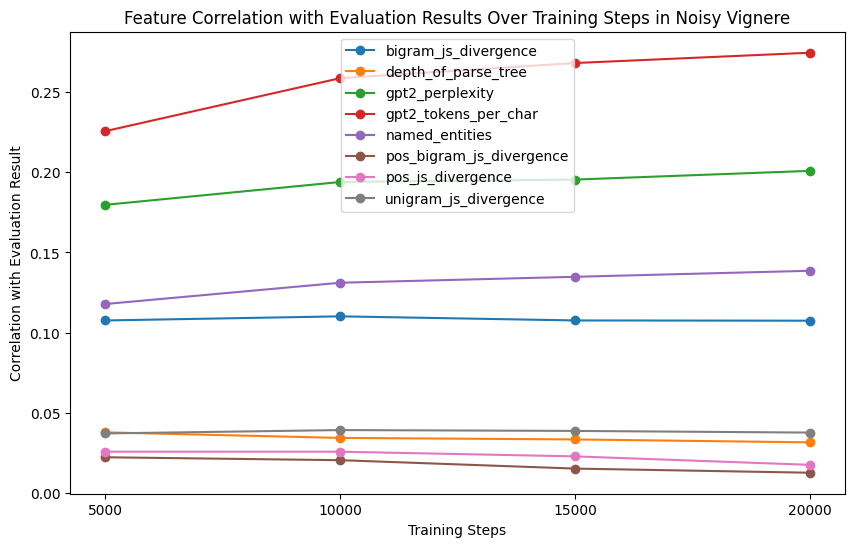

In [17]:
# do the same for vignere

correlation_data = []
# Calculate correlation for each feature across steps
for feature in features:  # 'features' should be replaced with your list of feature column names
    feature_correlations = []
    for step in steps:
        # en_noisyconsteenigma_checkpoint-5000_error_rate
        ev_col = f"en_noisevignere_checkpoint-{step}_error_rate"  
        # Calculate magnitude of correlation between feature and evaluation result at this step
        correlation = abs(data[feature].corr(data[ev_col]))
        feature_correlations.append(correlation)
    correlation_data.append(feature_correlations)

# Convert correlation data into a DataFrame for easy plotting
correlation_df = pd.DataFrame(correlation_data, index=features, columns=steps)

# Plotting
plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(steps, correlation_df.loc[feature], marker='o', label=feature)

plt.xticks(steps)
plt.xlabel('Training Steps')
plt.ylabel('Correlation with Evaluation Result')
plt.title('Feature Correlation with Evaluation Results Over Training Steps in Noisy Vignere')
plt.legend()
plt.show()